### The Tanzania Water Crisis

Authored by: Mark Njagi  
Student Pace: Part-Time  
Scheduled Project Review Date: 20th December 2023  
Instructor: Faith Rotich 

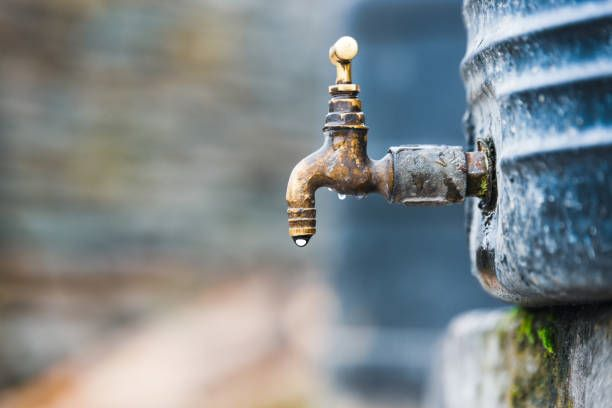

#### Overview

In this project, we build a classification model that predicts whether or not a water pump is functional based on certain predictor variables in a bid to alleviate the water crisis in the country. The data is obtained from the Taarifa waterpoints dashboard which aggregates data from the Tanzanian Ministry of Water. The analysis adopts an iterative model of classifier building. To begin with, we define a baseline Decision Tree, evaluate its performance and thence optimize it for classification by hyperparameter tuning. Finally, we adopt a Random Forest Classifier Model, evaluate performance and make recommendations based on the results. The main metric of success for the project is chosen to be precision score. 

--- 

####  Business Problem

The most recently published World Bank Annual Report highlights a dire water crisis in Tanzania. As at February 2023, only 60% of all households in the country had access to basic water supply, a situation which has contributed to thousands of otherwise predictable deaths and massive economic setbacks. The World Bank estimates a total of 30,000 fatalities annually, which in turn leads to reduced overall productivity of the nation and over-stretched medical spending. It is imperative to find a solution to this problem, which seems to grow worse by the day.

The aim of this project is to model and train a classification model that most precisely predicts whether a water pump is functional or due for immediate repair based on certain predictor variables. The information generated from this study is intended to inform key government stakeholders on the occurrence of non-functional water pumps across the country, and thus enable them make timely repairs that will alleviate the problem.

For the purposes of this research, the metric of success for the classification model has been set to a precision of 80%. Precision has been chosen as an evaluation metric after identifying the high cost of false positives in our analysis. To illustrate, a high precision rate is necessary because if the model were to identify a non-functional water well as functional, this could lead to non-action being taken leading to greater water shortage levels, more deaths and higher number of illnesses as a result. 

---

#### Data Understanding

Our data is sourced from the Tanzanian Ministry of Water, in collaboration with Taarifa and is available to download [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/).  

To begin, we import the necessary libraries and packages which will be used for our analysis:

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier

Then, we import the individual csv files, which have been pre-split into train and test datasets.

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

Next, we merge the two datasets into an individual dataset which we will clean up subsequently. 

In [3]:
df = train_data.merge(test_data, how='inner')

Now that the data has been merged, it is useful to skim through the data first before any further analysis.  
Visualizing the first ten rows of the dataset:


In [4]:
df.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


From the above, it is evident that each water pump has a unique id number and the dataset contains 41 columns describing different features of the above. Next, we query the number of rows and columns contained in the dataset.

In [5]:
shape = df.shape
print(f'The dataframe contains {shape[0]} rows and {shape[1]} columns.')

The dataframe contains 59400 rows and 41 columns.


An explanation of each of the 41 columns is as shown below:

- <span style="background-color: #f2f2f2;">*amount_tsh* </span> - Total static head (amount water available to waterpoint)  
- <span style="background-color: #f2f2f2;">*date_recorded* </span> - The date the row was entered  
- <span style="background-color: #f2f2f2;">*funder* </span> - Who funded the well  
- <span style="background-color: #f2f2f2;">*gps_height* </span> - Altitude of the well  
- <span style="background-color: #f2f2f2;">*installer* </span> - Organization that installed the well
- <span style="background-color: #f2f2f2;">*longitude* </span> - GPS coordinate
- <span style="background-color: #f2f2f2;">*latitude* </span> - GPS coordinate
- <span style="background-color: #f2f2f2;">*wpt_name* </span> - Name of the waterpoint if there is one
- <span style="background-color: #f2f2f2;">*basin* </span> - Geographical basin
- <span style="background-color: #f2f2f2;">*subvillage* </span> - Geographic location
- <span style="background-color: #f2f2f2;">*region* </span> - Geographic location
- <span style="background-color: #f2f2f2;">*region_code* </span> - Geographic location(coded)
- <span style="background-color: #f2f2f2;">*district_code* </span> - Geographic location(coded)
- <span style="background-color: #f2f2f2;">*lga* </span> - Geographic location
- <span style="background-color: #f2f2f2;">*ward* </span> - Geographic location
- <span style="background-color: #f2f2f2;">*population* </span> - Population around the well
- <span style="background-color: #f2f2f2;">*public_meeting* </span> - True or False
- <span style="background-color: #f2f2f2;">*recorded_by* </span> - Group entering this row of data
- <span style="background-color: #f2f2f2;">*scheme_management* </span> - Who operates the waterpoint
- <span style="background-color: #f2f2f2;">*scheme_name* </span> - Who operates the waterpoint
- <span style="background-color: #f2f2f2;">*permit* </span> - If the waterpoint is permitted
- <span style="background-color: #f2f2f2;">*construction_year* </span> - Year the waterpoint was constructed
- <span style="background-color: #f2f2f2;">*extraction_type* </span> - The kind of extraction the waterpoint uses
- <span style="background-color: #f2f2f2;">*extraction_type_group* </span> - The kind of extraction the waterpoint uses
- <span style="background-color: #f2f2f2;">*extraction_type_class* </span> - The kind of extraction the waterpoint uses
- <span style="background-color: #f2f2f2;">*management* </span> - How the waterpoint is managed
- <span style="background-color: #f2f2f2;">*management_group* </span> - - How the waterpoint is managed
- <span style="background-color: #f2f2f2;">*payment* </span> - Cost of the water
- <span style="background-color: #f2f2f2;">*payment_type* </span> - Cost of the water
- <span style="background-color: #f2f2f2;">*water_quality* </span> - Quality of the water
- <span style="background-color: #f2f2f2;">*quality_group* </span> - Quality of the water
- <span style="background-color: #f2f2f2;">*source* </span> - Source of the water
- <span style="background-color: #f2f2f2;">*source_type* </span> - Source of the water
- <span style="background-color: #f2f2f2;">*source_class* </span> - Source of the water
- <span style="background-color: #f2f2f2;">*waterpoint_type* </span> - The kind of waterpoint
- <span style="background-color: #f2f2f2;">*waterpoint_type_group* </span> - The kind of waterpoint

Another important consideration is to identify what each of these 41 columns represent and what data types are contained in each column. This will be useful to understand what features to include in the model and which ones will not be as crucial to our analysis.  

This is well illustrated by the below code block.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

From the above, it is evident that the columns are either categorical variables or numerical variables. Visualising the statistics of the numerical columns could also give critical insight to the analysis. 

In [7]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


The above brief overview of the data reveals a lot of information about the data.  

To summarize, our data contains **59400** rows and **41** columns. Each row represents an individual water point, marked by a unique id while the columns represent the features of the water wells such as construction year, geographic location etc. Further, ten of the 41 columns are categorical variables such as geographical region while the rest represent numerical features such as longitude and latitude.  

For our analysis, the **target variable** to be predicted will be **status_group**, which indicates whether a well is functional, non-functional or functional but needs repair, as shown below:

In [8]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

For the purposes of our analysis, we will convert the classification problem to a binary one by combining the non-functional and needs repair values to **Needs Repair**.

The justification for doing this is to enable the model to predict which wells are functioning and do not require intervention at the moment, and which of the others are non-functional or approaching non-functional status. However, before undertaking any further analysis, a lot of data cleaning is required to be done. 

### Data Cleaning

The process of data cleaning for the above dataset has been broken down into several individual stages.

1. Checking for Duplicated Values
2. Dropping Unnecessary and Repetitive Columns - as well as multi-collinear variables.
3. Handling Missing Values
4. Converting target variable to a binary class


1. First, we inspect our dataset for possible duplicate values as follows:


In [9]:
sum(df.duplicated())

0

Our dataset contains nil duplicated values.

Next, we investigate for related columns which would increase overfitting of our model and drop those columns as they will be unnecessary for our analysis.

Skimming through the data, it is evident that the following columns contain the same information and therefore should be dropped:
- region and region code
- quantity and quantity group
- source and source type
- waterpoint and waterpoint group
- water quality and quality group
- payment and payment type
- extraction type, extraction type group and extraction type class
- scheme management and management

Furthermore, some of the columns contain unnecessary information that will not be additional to our analysis.

In [10]:
cols_to_drop = ['extraction_type', 'extraction_type_group', 'payment', 'scheme_name', 'quality_group', 'management_group',
                   'quantity_group', 'source', 'installer', 'waterpoint_type_group', 'recorded_by', 'num_private', 
                   'id', 'subvillage', 'wpt_name', 'ward', 'funder', 'date_recorded', 'public_meeting', 
                   'region_code', 'district_code', 'lga', 'scheme_management', 'source_class']

In [11]:
df.drop(cols_to_drop, axis=1, inplace = True)

In [12]:
# To check the information of our dataset after dropping unnecessary and collinear columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   gps_height             59400 non-null  int64  
 2   longitude              59400 non-null  float64
 3   latitude               59400 non-null  float64
 4   basin                  59400 non-null  object 
 5   region                 59400 non-null  object 
 6   population             59400 non-null  int64  
 7   permit                 56344 non-null  object 
 8   construction_year      59400 non-null  int64  
 9   extraction_type_class  59400 non-null  object 
 10  management             59400 non-null  object 
 11  payment_type           59400 non-null  object 
 12  water_quality          59400 non-null  object 
 13  quantity               59400 non-null  object 
 14  source_type            59400 non-null  object 
 15  wa

Next, we check for missing values and identify how to handle the missing information per column.

In [13]:
df.isna().sum()

amount_tsh                  0
gps_height                  0
longitude                   0
latitude                    0
basin                       0
region                      0
population                  0
permit                   3056
construction_year           0
extraction_type_class       0
management                  0
payment_type                0
water_quality               0
quantity                    0
source_type                 0
waterpoint_type             0
status_group                0
dtype: int64

From the above, only one column - permit contains missing information. A visual representation of the column information is as follows:


In [14]:
df[df['permit'].isna()].head(5)

,amount_tsh,gps_height,longitude,latitude,basin,region,population,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quantity,source_type,waterpoint_type,status_group
43,0.0,1642,34.967789,-4.628921,Internal,Singida,1,NaN,1980,motorpump,vwc,unknown,unknown,dry,borehole,communal standpipe,non functional
47,0.0,0,33.540607,-9.172905,Lake Nyasa,Mbeya,0,NaN,0,gravity,vwc,never pay,soft,enough,spring,communal standpipe,functional
65,0.0,1415,34.621598,-5.173136,Internal,Singida,1,NaN,1970,motorpump,vwc,unknown,unknown,dry,borehole,communal standpipe,non functional
109,0.0,0,33.805081,-9.130674,Lake Nyasa,Mbeya,0,NaN,0,other,vwc,never pay,soft,enough,river/lake,communal standpipe,functional
118,0.0,1339,34.448645,-2.022663,Lake Victoria,Mara,600,NaN,1997,gravity,other,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional


For the above missing data, it would be logical to assume that the data about whether the permit was given is missing because the waterpoint is a natural source and therefore no permission was required. However, since there is less justification in making assumptions about the data, it would be prudent to drop the missing values so as to maintain the integrity of the dataset.

In [15]:
df.dropna(inplace = True)

In [16]:
# Checking to view if all N/A values have been addressed
df.isna().sum()

amount_tsh               0
gps_height               0
longitude                0
latitude                 0
basin                    0
region                   0
population               0
permit                   0
construction_year        0
extraction_type_class    0
management               0
payment_type             0
water_quality            0
quantity                 0
source_type              0
waterpoint_type          0
status_group             0
dtype: int64

The next step of handling missing data is to check for the columns where the value 0 has been included as a placeholder instead of an actual data value.

In [17]:
for col in df.columns:
    print(df[col].value_counts(), sep = '/n')

0.0         39011
500.0        3075
50.0         2340
1000.0       1445
20.0         1430
            ...  
53.0            1
138000.0        1
306.0           1
6300.0          1
59.0            1
Name: amount_tsh, Length: 95, dtype: int64
 0       19332
-15         60
-16         55
-13         55
-20         52
         ...  
 2353        1
 2332        1
 2347        1
 2344        1
 2366        1
Name: gps_height, Length: 2426, dtype: int64
0.000000     1812
37.374017       2
37.540901       2
32.987670       2
37.252194       2
             ... 
34.758353       1
33.904387       1
32.259128       1
30.587574       1
38.104048       1
Name: longitude, Length: 54484, dtype: int64
-2.000000e-08    1812
-7.175174e+00       2
-6.965834e+00       2
-7.177203e+00       2
-2.490324e+00       2
                 ... 
-7.747800e+00       1
-4.758169e+00       1
-9.575981e+00       1
-3.239877e+00       1
-6.747464e+00       1
Name: latitude, Length: 54486, dtype: int64
Lake Victoria       

From the above we can observe that 19580 values have 0 as the year of construction. For the purposes of our analysis, we will infer that these waterpoints are natural and therefore were not technically constructed. Therefore, we will assign the oldest year of construction which will be 1900, for uniformity. 

In [18]:
df['construction_year'].replace(to_replace = 0, value = 1900, inplace = True)

In [19]:
df['construction_year'].value_counts()

1900    19580
2008     2576
2009     2491
2010     2430
2000     1566
2007     1559
2006     1447
2003     1276
2011     1211
2004     1109
2002     1065
1978     1027
2012     1026
2005      985
1995      979
1999      954
1985      943
1998      924
1984      779
1996      768
1982      741
1972      705
1994      703
1974      676
1990      667
1980      647
1992      632
1997      613
1993      595
2001      533
1988      521
1983      487
1975      437
1986      433
1976      411
1991      323
1989      316
1970      310
1987      301
1981      238
1977      199
1979      192
1973      183
2013      173
1971      145
1967       86
1963       85
1968       68
1969       59
1960       45
1964       40
1962       29
1961       20
1965       19
1966       17
Name: construction_year, dtype: int64

Furthermore, since Tanzania lies to the right of the Greenwich Meridian and to the south of the Equator, we expect all latitude values to be negative and all longitude values to be positive and not equal to zero. Therefore, we will assume that any otherwise input figures of longitude and latitude have been erroneously input and shall be dropped.

In [20]:
df = df.loc[(df['longitude'] >= 0) & (df['latitude'] <= 0)]

Additionally, we also convert the permit column which is a boolean, into integers for ease of our machine learning model. This is achieved as follows:

In [21]:
df['permit'] = df['permit'].astype(bool).astype(int)

Next, we convert the target variable status_group. We replace all non-functional values as well as functional needs repair values to 'Needs Repair' for use in our analysis. 

In [22]:
# To check the unique values
df['status_group'].value_counts()

functional                 30586
non functional             21741
functional needs repair     4017
Name: status_group, dtype: int64

In [23]:
df['status_group'] = df['status_group'].replace(to_replace =  ['non functional', 'functional needs repair'], value = 'needs repair')
df['status_group'].value_counts()

functional      30586
needs repair    25758
Name: status_group, dtype: int64

Next, we create a status column which maps functional waterpoints to 1 and non-functional waterpoints to 0 as illustrated below:

In [24]:
df['target'] = (df['status_group'] == 'functional').astype(int)
df.drop('status_group', axis = 1, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56344 entries, 0 to 59399
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             56344 non-null  float64
 1   gps_height             56344 non-null  int64  
 2   longitude              56344 non-null  float64
 3   latitude               56344 non-null  float64
 4   basin                  56344 non-null  object 
 5   region                 56344 non-null  object 
 6   population             56344 non-null  int64  
 7   permit                 56344 non-null  int32  
 8   construction_year      56344 non-null  int64  
 9   extraction_type_class  56344 non-null  object 
 10  management             56344 non-null  object 
 11  payment_type           56344 non-null  object 
 12  water_quality          56344 non-null  object 
 13  quantity               56344 non-null  object 
 14  source_type            56344 non-null  object 
 15  wa

#### One-Hot Encoding

To prepare the model for analysis even further, the categorical columns were one-hot encoded so as to enable machine learning algorithms to work. This was done by creating dummy variables as follows:

In [26]:
categorical_columns = ['basin', 'region', 'extraction_type_class', 'management', 'payment_type', 'water_quality', 'quantity', 'source_type', 'waterpoint_type']
data = pd.get_dummies(df, columns = categorical_columns)

#### Data Preprocessing and Validation

In the data preprocessing and validation step, we separated the predictor and target columns and performed a train_test_split on the dataset to prevent data leakage. The size of the resulting train size was chosen to be 80% and a random state of 100 was considered.

In [27]:
X = data.drop(['target'], axis = 1)
y = data['target']

In [28]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Baseline Model - Simple Decision Tree

In [29]:
clf = tree.DecisionTreeClassifier(random_state = 100) # instantiate a decision tree classifier
clf = clf.fit(X_train, y_train)     # fitting the model

In [30]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [31]:
train_precision = precision_score(y_train, y_pred_train)
test_precision = precision_score(y_test, y_pred_test)

In [32]:
print (f'Training Precision: {train_precision}')
print (f'Test Precision: {test_precision}')

Training Precision: 0.991696370706416
Test Precision: 0.7895426979183741


From the above, it is clear that the baseline Decision Tree memorized the training data rather than learning underlying patterns. The model training precision score of 99% illustrates that it is highly sensitive to noise in the dataset, which is confirmed by its poor performance on the test data. 


#### Hyperparameter Tuning using GridSearchCV

In [33]:
dt = tree.DecisionTreeClassifier(random_state = 100)  # instantiating a second Decision Tree Classifier

In [34]:
param_grid = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}


In [35]:
dt_tree = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5, scoring = 'precision')
dt_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='precision')

In [36]:
print(f'The best parameters are {dt_tree.best_params_}')

The best parameters are {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [37]:
# Next, we fit the decision tree with the optimal parameters to our test data
best_dt_tree = tree.DecisionTreeClassifier(**dt_tree.best_params_)
best_dt_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5)

In [38]:
# Making predictions on the train and test sets and evaluating precision
y_pred_train = best_dt_tree.predict(X_train)
y_pred_test = best_dt_tree.predict(X_test)

In [39]:
# Testing Precision
test_precision = precision_score(y_test, y_pred_test)

print (f'Test Precision: {test_precision}')

Test Precision: 0.8036180205253087


#### Random Forest Classifier
To further improve generalizability of our model to unseen data and further improve on the precision, we use random trees as an ensemble learning method that builds multiple decision trees and merges their performance for optimized performance. 

In [40]:
# Instantiating the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [41]:
# Training the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Predictions 
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

In [43]:
# Testing the Precision
train_precision = precision_score(y_train, y_pred_train)
test_precision = precision_score(y_test, y_pred_test)

print (f'Test Precision: {test_precision}')

Test Precision: 0.8135540287320425


#### Evaluation and Conclusion

The above analysis shows that the simple decision tree thoroughly overfitted the data and was unable to generalize to new information judging from the low precision score of 78%. After conducting hyperparameter tuning, the precision score improved to 80.36%, which although was above the set metric of success, still was not the best model for our analysis. The random forest classifier, with 100 samples, proved to be the most precise classifier for our problem with a precision score of 81.35%, and is recommended for analysing waterpoint functionality. 